In [1]:
#Dataset: https://www.kaggle.com/janiobachmann/bank-marketing-dataset/activity
#Dataset Link: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
import pandas as pd
import numpy as np

In [ ]:
#Ref: For graphs
#https://datascienceplus.com/seaborn-categorical-plots-in-python/#:~:text=Seaborn%20is%20a%20Python%20visualization,routines%20from%20scipy%20and%20statsmodels.
#for groupby both columns
#https://stackoverflow.com/questions/45561118/how-i-can-apply-groupby-two-times-on-pandas-data-frame

In [2]:
data=pd.read_csv('bank.csv')
print('Shape of the data = ',data.shape)
data.head()

Shape of the data =  (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [24]:
# The data is balanced over deposit or our target feature
data['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [4]:
# pdays is number of times customer is contacted in the compaign
# number of customers not contacted in the compaign
data['pdays'].value_counts()[-1]

8324

In [5]:
data['job'].value_counts().index

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'student', 'unemployed', 'entrepreneur',
       'housemaid', 'unknown'],
      dtype='object')

In [6]:
# day says last day dd of the month contacted
data['day'].nunique()

31

In [8]:
neg=[x for x in data['balance'] if x<0]
print(len(neg))


688


# Exploratory Data Analysis

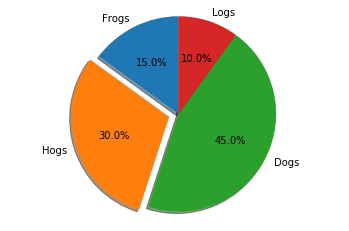

In [9]:
labels=data['job'].unique()
# print(labels)
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

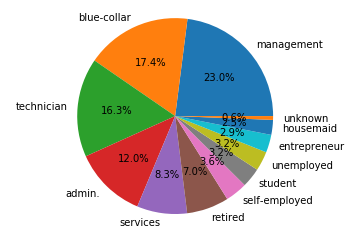

In [10]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
plt.figure(1, figsize=(40,20))
ax1.pie(data['job'].value_counts(),labels=list(data['job'].value_counts().index),autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

In [11]:
data.groupby('job').agg('count')

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
job,,,,,,,,,,,,,,,,
admin.,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334
blue-collar,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944
entrepreneur,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328
housemaid,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274
management,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566
retired,778,778,778,778,778,778,778,778,778,778,778,778,778,778,778,778
self-employed,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405
services,923,923,923,923,923,923,923,923,923,923,923,923,923,923,923,923
student,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360


In [13]:
# data.groupby(['deposit', 'job'])['deposit'].agg('count')['yes']

job
admin.            631
blue-collar       708
entrepreneur      123
housemaid         109
management       1301
retired           516
self-employed     187
services          369
student           269
technician        840
unemployed        202
unknown            34
Name: deposit, dtype: int64

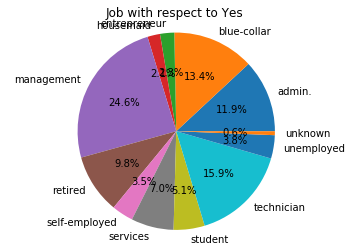

In [110]:
# To see if people of any profession are more inclined towards our compaign
import matplotlib.pyplot as plt
pie_var1 = data.groupby(['deposit', 'job'])['deposit'].agg('count')['yes']
fig1, ax2 = plt.subplots()
plt.figure(1, figsize=(40,20))
ax2.pie(pie_var1,labels=list(pie_var1.index),autopct='%1.1f%%')
ax2.axis('equal')
plt.title('Job with respect to Yes')
plt.show()
#Observation: There is no major inclination of people of any profession since these distribution is more or less the same as compared to the population.

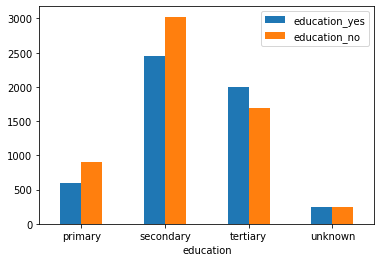

In [126]:
education_yes = data.groupby(['deposit','education'])['deposit'].agg('count')['yes'].values
education_no = data.groupby(['deposit','education'])['deposit'].agg('count')['no'].values
index = data.groupby(['deposit','education'])['deposit'].agg('count')['yes'].index
df1 = df = pd.DataFrame({'education_yes': education_yes,
                   'education_no': education_no}, index=index)
ax = df.plot.bar(rot=0)

In [35]:
# data1 = pd.get_dummies(data['deposit'])
# converting the categorical deposit feature to binary using sklearn
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
labels_coulumn=encoder.fit_transform(data['deposit'])
deposit_mappings = {index: label for index, label in 
                  enumerate(encoder.classes_)}
deposit_mappings

{0: 'no', 1: 'yes'}

In [64]:
job_coulumn=encoder.fit_transform(data['job'])
job_mappings = {index: label for index, label in 
                  enumerate(encoder.classes_)}
job_mappings

{0: 'admin.',
 1: 'blue-collar',
 2: 'entrepreneur',
 3: 'housemaid',
 4: 'management',
 5: 'retired',
 6: 'self-employed',
 7: 'services',
 8: 'student',
 9: 'technician',
 10: 'unemployed',
 11: 'unknown'}

In [68]:
marital_coulumn=encoder.fit_transform(data['marital'])
marital_mappings = {index: label for index, label in 
                  enumerate(encoder.classes_)}
marital_mappings

{0: 'divorced', 1: 'married', 2: 'single'}

In [69]:
education_coulumn=encoder.fit_transform(data['education'])
education_mappings = {index: label for index, label in 
                  enumerate(encoder.classes_)}
education_mappings

{0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'}

In [70]:
default_coulumn=encoder.fit_transform(data['default'])
default_mappings = {index: label for index, label in 
                  enumerate(encoder.classes_)}
default_mappings

{0: 'no', 1: 'yes'}

In [71]:
housing_coulumn=encoder.fit_transform(data['housing'])
housing_mappings = {index: label for index, label in 
                  enumerate(encoder.classes_)}
housing_mappings

{0: 'no', 1: 'yes'}

In [72]:
loan_coulumn=encoder.fit_transform(data['loan'])
loan_mappings = {index: label for index, label in 
                  enumerate(encoder.classes_)}
loan_mappings

{0: 'no', 1: 'yes'}

In [73]:
contact_coulumn=encoder.fit_transform(data['contact'])
contact_mappings = {index: label for index, label in 
                  enumerate(encoder.classes_)}
contact_mappings

{0: 'cellular', 1: 'telephone', 2: 'unknown'}

In [74]:
month_coulumn=encoder.fit_transform(data['month'])
month_mappings = {index: label for index, label in 
                  enumerate(encoder.classes_)}
month_mappings

{0: 'apr',
 1: 'aug',
 2: 'dec',
 3: 'feb',
 4: 'jan',
 5: 'jul',
 6: 'jun',
 7: 'mar',
 8: 'may',
 9: 'nov',
 10: 'oct',
 11: 'sep'}

In [75]:
poutcome_coulumn=encoder.fit_transform(data['poutcome'])
poutcome_mappings = {index: label for index, label in 
                  enumerate(encoder.classes_)}
poutcome_mappings

{0: 'failure', 1: 'other', 2: 'success', 3: 'unknown'}

In [37]:
# writing down this transformed column in our DataFrame
data['deposit']=labels_coulumn
data[5289:5293]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5289,57,retired,single,primary,no,604,no,no,cellular,19,nov,187,1,-1,0,unknown,0
5290,45,admin.,divorced,secondary,no,0,yes,no,cellular,17,nov,102,1,-1,0,unknown,0
5291,48,blue-collar,married,secondary,no,238,yes,yes,cellular,2,jun,118,2,81,1,success,0
5292,34,admin.,single,secondary,no,673,yes,no,cellular,29,jan,89,1,260,2,failure,0


In [76]:
data['job']=job_coulumn
data['marital']=marital_coulumn
data['education']=education_coulumn
data['default']=default_coulumn
data['housing']=housing_coulumn
data['loan']=loan_coulumn
data['contact']=contact_coulumn
data['month']=month_coulumn
data['poutcome']=poutcome_coulumn

In [33]:
data.groupby('deposit').groups

{'no': Int64Index([ 5289,  5290,  5291,  5292,  5293,  5294,  5295,  5296,  5297,
              5298,
             ...
             11152, 11153, 11154, 11155, 11156, 11157, 11158, 11159, 11160,
             11161],
            dtype='int64', length=5873),
 'yes': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             5279, 5280, 5281, 5282, 5283, 5284, 5285, 5286, 5287, 5288],
            dtype='int64', length=5289)}

In [77]:
# data['previous'].value_counts()
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [78]:
# Before we go ahead and build any machine learning models from this data, let's split the data with 80:20.
y = data['deposit'].values
X = data.drop(['deposit'], axis=1)
X.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3


In [79]:
print('Shape of X: ',X.shape)
print('Shape of y: ',y.shape)

Shape of X:  (11162, 16)
Shape of y:  (11162,)


## Splitting data into train and test(80:20)

In [81]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [85]:
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train:  (8929, 16)
Shape of X_test:  (2233, 16)
Shape of y_train (8929,)
Shape of y_test (2233,)


## Machine learning models for classification

In [155]:
# let's create models through trying out multiple parameters and finding out the best model with the best parameters. 
# For this we will be using gridSearchCV technique.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = {"C":np.logspace(-7,3,7),"penalty":['l1','l2']}
log_reg=LogisticRegression()
clf=GridSearchCV(log_reg, parameters, cv=10)
clf.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\moham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.7621213072276147


C:\Users\moham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [156]:
from sklearn import metrics
clf=log_reg=LogisticRegression(C=0.01, penalty= 'l2', solver='lbfgs',max_iter= 500)
clf.fit(X_train,y_train)
print("score",clf.score(X_test,y_test))
print(metrics.classification_report(y_test, clf.predict(X_test)))

score 0.7769816390506046
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1164
           1       0.78      0.74      0.76      1069

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



C:\Users\moham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [161]:
clf.intercept_

array([-0.16807194])

In [100]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [102]:
clf.fit(X=X_train, y=y_train) # fitting our model
print("score",clf.score(X_test,y_test))

-- Epoch 1
Norm: 2.65, NNZs: 16, Bias: -0.069720, T: 8929, Avg. loss: 291.804860
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.89, NNZs: 16, Bias: -0.107593, T: 17858, Avg. loss: 313.862183
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.50, NNZs: 16, Bias: -0.138265, T: 26787, Avg. loss: 346.909457
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.84, NNZs: 16, Bias: -0.157204, T: 35716, Avg. loss: 301.348564
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 5.30, NNZs: 16, Bias: -0.181096, T: 44645, Avg. loss: 310.133667
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 5.44, NNZs: 16, Bias: -0.200467, T: 53574, Avg. loss: 269.064923
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 5.58, NNZs: 16, Bias: -0.221554, T: 62503, Avg. loss: 349.461119
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 5.65, NNZs: 16, Bias: -0.237215, T: 71432, Avg. loss: 278.963154
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 5.75, NNZs: 16, Bias: -0.253260, T: 80361, Avg. 

### Now let's try with the scaled features 

In [109]:
# X_train['age'].head()
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['age'].values.reshape(-1,1))

X_train_age_norm = normalizer.transform(X_train['age'].values.reshape(-1,1))
X_test_age_norm = normalizer.transform(X_test['age'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_age_norm.shape, y_train.shape)
print(X_test_age_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(8929, 1) (8929,)
(2233, 1) (2233,)


In [115]:
from sklearn.preprocessing import OneHotEncoder
vectorizer = OneHotEncoder()
vectorizer.fit(X_train['job'].values.reshape(-1, 1)) # fit has to happen only on train data

X_train_job_ohe = vectorizer.transform(X_train['job'].values.reshape(-1,1))
# X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_job_ohe = vectorizer.transform(X_test['job'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_job_ohe.shape, y_train.shape)
# print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_job_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(8929, 12) (8929,)
(2233, 12) (2233,)
['x0_0' 'x0_1' 'x0_2' 'x0_3' 'x0_4' 'x0_5' 'x0_6' 'x0_7' 'x0_8' 'x0_9'
 'x0_10' 'x0_11']


In [116]:
vectorizer = OneHotEncoder()
vectorizer.fit(X_train['marital'].values.reshape(-1, 1)) # fit has to happen only on train data

X_train_marital_ohe = vectorizer.transform(X_train['marital'].values.reshape(-1,1))
# X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_marital_ohe = vectorizer.transform(X_test['marital'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_marital_ohe.shape, y_train.shape)
# print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_marital_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(8929, 3) (8929,)
(2233, 3) (2233,)
['x0_0' 'x0_1' 'x0_2']


In [133]:
vectorizer = OneHotEncoder()
vectorizer.fit(X_train['education'].values.reshape(-1, 1)) # fit has to happen only on train data

X_train_education_ohe = vectorizer.transform(X_train['education'].values.reshape(-1,1))
X_test_education_ohe = vectorizer.transform(X_test['education'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_education_ohe.shape, y_train.shape)
print(X_test_education_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(8929, 4) (8929,)
(2233, 4) (2233,)
['x0_0' 'x0_1' 'x0_2' 'x0_3']


In [117]:
normalizer = Normalizer()
normalizer.fit(X_train['balance'].values.reshape(-1,1))

X_train_balance_norm = normalizer.transform(X_train['balance'].values.reshape(-1,1))
X_test_balance_norm = normalizer.transform(X_test['balance'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_balance_norm.shape, y_train.shape)
print(X_test_balance_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(8929, 1) (8929,)
(2233, 1) (2233,)


In [118]:
vectorizer = OneHotEncoder()
vectorizer.fit(X_train['contact'].values.reshape(-1, 1)) # fit has to happen only on train data

X_train_contact_ohe = vectorizer.transform(X_train['contact'].values.reshape(-1,1))
X_test_contact_ohe = vectorizer.transform(X_test['contact'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_contact_ohe.shape, y_train.shape)
print(X_test_contact_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(8929, 3) (8929,)
(2233, 3) (2233,)
['x0_0' 'x0_1' 'x0_2']


In [119]:
vectorizer = OneHotEncoder()
vectorizer.fit(X_train['day'].values.reshape(-1, 1)) # fit has to happen only on train data

X_train_day_ohe = vectorizer.transform(X_train['day'].values.reshape(-1,1))
X_test_day_ohe = vectorizer.transform(X_test['day'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_day_ohe.shape, y_train.shape)
print(X_test_day_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(8929, 31) (8929,)
(2233, 31) (2233,)
['x0_1' 'x0_2' 'x0_3' 'x0_4' 'x0_5' 'x0_6' 'x0_7' 'x0_8' 'x0_9' 'x0_10'
 'x0_11' 'x0_12' 'x0_13' 'x0_14' 'x0_15' 'x0_16' 'x0_17' 'x0_18' 'x0_19'
 'x0_20' 'x0_21' 'x0_22' 'x0_23' 'x0_24' 'x0_25' 'x0_26' 'x0_27' 'x0_28'
 'x0_29' 'x0_30' 'x0_31']


In [120]:
vectorizer = OneHotEncoder()
vectorizer.fit(X_train['month'].values.reshape(-1, 1)) # fit has to happen only on train data

X_train_month_ohe = vectorizer.transform(X_train['month'].values.reshape(-1,1))
X_test_month_ohe = vectorizer.transform(X_test['month'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_month_ohe.shape, y_train.shape)
print(X_test_month_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(8929, 12) (8929,)
(2233, 12) (2233,)
['x0_0' 'x0_1' 'x0_2' 'x0_3' 'x0_4' 'x0_5' 'x0_6' 'x0_7' 'x0_8' 'x0_9'
 'x0_10' 'x0_11']


In [138]:
normalizer = Normalizer()
normalizer.fit(X_train['duration'].values.reshape(-1,1))

X_train_duration_norm = normalizer.transform(X_train['duration'].values.reshape(-1,1))
X_test_duration_norm = normalizer.transform(X_test['duration'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_duration_norm.shape, y_train.shape)
print(X_test_duration_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(8929, 1) (8929,)
(2233, 1) (2233,)


In [129]:
normalizer = Normalizer()
normalizer.fit(X_train['campaign'].values.reshape(-1,1))

X_train_campaign_norm = normalizer.transform(X_train['campaign'].values.reshape(-1,1))
X_test_campaign_norm = normalizer.transform(X_test['campaign'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_campaign_norm.shape, y_train.shape)
print(X_test_campaign_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(8929, 1) (8929,)
(2233, 1) (2233,)


In [130]:
normalizer = Normalizer()
normalizer.fit(X_train['pdays'].values.reshape(-1,1))

X_train_pdays_norm = normalizer.transform(X_train['pdays'].values.reshape(-1,1))
X_test_pdays_norm = normalizer.transform(X_test['pdays'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_pdays_norm.shape, y_train.shape)
print(X_test_pdays_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(8929, 1) (8929,)
(2233, 1) (2233,)


In [131]:
normalizer = Normalizer()
normalizer.fit(X_train['previous'].values.reshape(-1,1))

X_train_previous_norm = normalizer.transform(X_train['previous'].values.reshape(-1,1))
X_test_previous_norm = normalizer.transform(X_test['previous'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_previous_norm.shape, y_train.shape)
print(X_test_previous_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(8929, 1) (8929,)
(2233, 1) (2233,)


In [132]:
vectorizer = OneHotEncoder()
vectorizer.fit(X_train['poutcome'].values.reshape(-1, 1)) # fit has to happen only on train data

X_train_poutcome_ohe = vectorizer.transform(X_train['poutcome'].values.reshape(-1,1))
X_test_poutcome_ohe = vectorizer.transform(X_test['poutcome'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_poutcome_ohe.shape, y_train.shape)
print(X_test_poutcome_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(8929, 4) (8929,)
(2233, 4) (2233,)
['x0_0' 'x0_1' 'x0_2' 'x0_3']


In [145]:
X_train_default= X_train['default'].values.reshape(-1,1)
X_test_default= X_test['default'].values.reshape(-1,1)
print('shape of X_train_default: ',X_train_default.shape)
print('shape of X_test_default: ',X_test_default.shape)
print("-"*100)
X_train_housing= X_train['housing'].values.reshape(-1,1)
X_test_housing= X_test['housing'].values.reshape(-1,1)
print('shape of X_train_housing: ',X_train_housing.shape)
print('shape of X_test_housing: ',X_test_housing.shape)
print("-"*100)
X_train_loan= X_train['loan'].values.reshape(-1,1)
X_test_loan= X_test['default'].values.reshape(-1,1)
print('shape of X_train_loan: ',X_train_loan.shape)
print('shape of X_test_loan: ',X_test_loan.shape)

shape of X_train_default:  (8929, 1)
shape of X_test_default:  (2233, 1)
----------------------------------------------------------------------------------------------------
shape of X_train_housing:  (8929, 1)
shape of X_test_housing:  (2233, 1)
----------------------------------------------------------------------------------------------------
shape of X_train_loan:  (8929, 1)
shape of X_test_loan:  (2233, 1)


In [141]:
X_train_default.head()

6902    0
9241    0
3154    0
2082    0
9129    0
Name: default, dtype: int32

In [2]:
# X_train_age_norm.head()
X_train_default.head()

NameError: name 'X_train_default' is not defined

### Concatenating all the Scaled and preprocessed features 

In [146]:
from scipy.sparse import hstack
X_tr = hstack((X_train_age_norm, X_train_job_ohe, X_train_marital_ohe, X_train_education_ohe, X_train_default, X_train_balance_norm, X_train_housing, X_train_loan, X_train_contact_ohe, X_train_day_ohe, X_train_month_ohe, X_train_duration_norm, X_train_campaign_norm, X_train_pdays_norm, X_train_previous_norm,X_train_poutcome_ohe)).tocsr()
X_te = hstack((X_test_age_norm, X_test_job_ohe, X_test_marital_ohe, X_test_education_ohe, X_test_default, X_test_balance_norm, X_test_housing, X_test_loan, X_test_contact_ohe, X_test_day_ohe, X_test_month_ohe, X_test_duration_norm, X_test_campaign_norm, X_test_pdays_norm, X_test_previous_norm,X_test_poutcome_ohe)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(8929, 78) (8929,)
(2233, 78) (2233,)


## Machine Learning Modelling with the Scaled Features

In [147]:
# let's create models through trying out multiple parameters and finding out the best model with the best parameters. 
# For this we will be using gridSearchCV technique.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = {"C":np.logspace(-7,3,7),"penalty":['l1','l2']}
log_reg=LogisticRegression()
clf=GridSearchCV(log_reg, parameters, cv=10)
clf.fit(X_tr,y_train)
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\moham\anaconda3\lib\site-packages\

tuned hpyerparameters :(best parameters)  {'C': 21.544346900318867, 'penalty': 'l2'}
accuracy : 0.7029918800435877


C:\Users\moham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


###  Using SVM for classification

In [164]:
from sklearn import linear_model
model=linear_model.SGDClassifier(loss='hinge')
model.fit(X_tr,y_train)
print("score",model.score(X_te,y_test))
print(metrics.classification_report(y_test, model.predict(X_te)))

score 0.7021943573667712
              precision    recall  f1-score   support

           0       0.68      0.82      0.74      1164
           1       0.75      0.57      0.65      1069

    accuracy                           0.70      2233
   macro avg       0.71      0.70      0.69      2233
weighted avg       0.71      0.70      0.70      2233



## Classifying with Decision Tree Classifier 

In [167]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(class_weight ='balanced')
parameters = {'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}
clf = GridSearchCV(dt_clf, parameters, cv= 10, scoring='accuracy', verbose=10,return_train_score=True)
clf.fit(X_tr,y_train)
train_score= clf.cv_results_['mean_train_score']
train_score= clf.cv_results_['std_train_score']
cv_score = clf.cv_results_['mean_test_score']
cv_score = clf.cv_results_['std_test_score']
bestDepth=clf.best_params_['max_depth']
bestScore=clf.best_score_
print("BEST DEPTH: ",clf.best_params_['max_depth'],"BEST MIN SAMPLE SPLITS: ",clf.best_params_['min_samples_split']," BEST SCORE: ",clf.best_score_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=(train=0.605, test=0.607), total=   0.0s
[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=(train=0.606, test=0.605), total=   0.0s
[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=(train=0.607, test=0.590), total=   0.0s
[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=(train=0.603, test=0.624), total=   0.0s
[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=(train=0.603, test=0.624), total=   0.0s
[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=(train=0.607, test=0.596), tot

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=(train=0.605, test=0.609), total=   0.0s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=(train=0.605, test=0.613), total=   0.0s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=(train=0.605, test=0.607), total=   0.0s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=(train=0.606, test=0.605), total=   0.0s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=(train=0.607, test=0.590), total=   0.0s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV]  max_depth=1, min_samples_split=100, score=(train=0.603, test=0.624), total=   0.0s
[CV] max_depth=1, min_samples_split=100 .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    7.0s finished


In [169]:
print("score",clf.score(X_te,y_test))
print(metrics.classification_report(y_test, clf.predict(X_te)))

score 0.6918943125839677
              precision    recall  f1-score   support

           0       0.68      0.79      0.73      1164
           1       0.72      0.59      0.65      1069

    accuracy                           0.69      2233
   macro avg       0.70      0.69      0.69      2233
weighted avg       0.70      0.69      0.69      2233



## Random Forest Classifier 

In [174]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=51)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
clf_rf = GridSearchCV(rf_clf, parameters, cv= 10, scoring='accuracy', verbose=10,return_train_score=True)
clf_rf.fit(X_train,y_train)
train_score= clf_rf.cv_results_['mean_train_score']
train_score= clf_rf.cv_results_['std_train_score']
cv_score = clf_rf.cv_results_['mean_test_score']
cv_score = clf_rf.cv_results_['std_test_score']
bestDepth=clf_rf.best_params_['max_depth']
bestScore=clf_rf.best_score_
print("BEST DEPTH: ",clf_rf.best_params_['max_depth'],"BEST min_samples_split: ",clf_rf.best_params_['min_samples_split']," BEST SCORE: ",clf_rf.best_score_)


BEST DEPTH:  50 BEST min_samples_split:  10  BEST SCORE:  0.8464544865646608


In [176]:
print("score",clf_rf.score(X_test,y_test))
print(metrics.classification_report(y_test, clf_rf.predict(X_test)))

score 0.8329601433049709
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1164
           1       0.79      0.88      0.83      1069

    accuracy                           0.83      2233
   macro avg       0.84      0.83      0.83      2233
weighted avg       0.84      0.83      0.83      2233



In [177]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
clf_rf2 = GridSearchCV(rf_clf, parameters, cv= 10, scoring='accuracy', verbose=10,return_train_score=True)
clf_rf2.fit(X_tr,y_train)
train_score= clf_rf2.cv_results_['mean_train_score']
train_score= clf_rf2.cv_results_['std_train_score']
cv_score = clf_rf2.cv_results_['mean_test_score']
cv_score = clf_rf2.cv_results_['std_test_score']
bestDepth=clf_rf2.best_params_['max_depth']
bestScore=clf_rf2.best_score_
print("BEST DEPTH: ",clf_rf2.best_params_['max_depth'],"BEST min_samples_split: ",clf_rf2.best_params_['min_samples_split']," BEST SCORE: ",clf_rf2.best_score_)


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=1, min_samples_split=5, score=(train=0.620, test=0.610), total=   0.2s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.620, test=0.611), total=   0.2s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.622, test=0.589), total=   0.2s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.619, test=0.626), total=   0.2s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.618, test=0.629), total=   0.2s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.620, test=0.619), total=   0.2s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.4s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.618, test=0.611), total=   0.2s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.6s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.620, test=0.628), total=   0.2s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.618, test=0.632), total=   0.2s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.1s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.617, test=0.633), total=   0.2s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=(train=0.620, test=0.610), total=   0.2s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=(train=0.620, test=0.611), total=   0.2s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=(train=0.622, test=0.589), total=   0.2s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=(train=0.619, test=0.626), total=   0.2s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=(train=0.618, test=0.629), total=   0.2s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  2.0min finished


BEST DEPTH:  50 BEST min_samples_split:  100  BEST SCORE:  0.7266216060138898


## Xgboost Classifier 

In [178]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
clf_xgb = GridSearchCV(xgb, parameters, cv= 10, scoring='accuracy', verbose=10,return_train_score=True)
clf_xgb.fit(X_tr,y_train)
train_score= clf_xgb.cv_results_['mean_train_score']
train_score= clf_xgb.cv_results_['std_train_score']
cv_score = clf_xgb.cv_results_['mean_test_score']
cv_score = clf_xgb.cv_results_['std_test_score']
bestDepth=clf_xgb.best_params_['max_depth']
bestScore=clf_xgb.best_score_
print("BEST DEPTH: ",clf_xgb.best_params_['max_depth'],"BEST min_samples_split: ",clf_xgb.best_params_['min_samples_split']," BEST SCORE: ",clf_rf2.best_score_)


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\moham\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:22:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:22:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=1, min_samples_split=5, score=(train=0.701, test=0.713), total=   1.8s
[CV] max_depth=1, min_samples_split=5 ................................
[11:22:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.695, test=0.702), total=   0.8s
[CV] max_depth=1, min_samples_split=5 ................................
[11:22:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:22:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.702, test=0.704), total=   0.8s
[CV] max_depth=1, min_samples_split=5 ................................
[11:22:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:22:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.696, test=0.714), total=   0.8s
[CV] max_depth=1, min_samples_split=5 ................................
[11:22:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:22:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.701, test=0.704), total=   0.8s
[CV] max_depth=1, min_samples_split=5 ................................
[11:22:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:22:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.3s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.705, test=0.670), total=   0.9s
[CV] max_depth=1, min_samples_split=5 ................................
[11:22:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:22:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.2s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.696, test=0.679), total=   0.9s
[CV] max_depth=1, min_samples_split=5 ................................
[11:22:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:22:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.1s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.703, test=0.677), total=   0.9s
[CV] max_depth=1, min_samples_split=5 ................................
[11:22:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:22:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.0s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.700, test=0.695), total=   0.8s
[CV] max_depth=1, min_samples_split=5 ................................
[11:22:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:22:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.9s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.696, test=0.695), total=   0.8s
[CV] max_depth=1, min_samples_split=10 ...............................
[11:22:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:22:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=1, min_samples_split=10, score=(train=0.701, test=0.713), total=   0.8s
[CV] max_depth=1, min_samples_split=10 ..

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 20.6min finished


BEST DEPTH:  5 BEST min_samples_split:  5  BEST SCORE:  0.7266216060138898


In [180]:
print("score",clf_xgb.score(X_te,y_test))
print(metrics.classification_report(y_test, clf_xgb.predict(X_te)))

score 0.7245857590685177
              precision    recall  f1-score   support

           0       0.69      0.84      0.76      1164
           1       0.78      0.60      0.67      1069

    accuracy                           0.72      2233
   macro avg       0.74      0.72      0.72      2233
weighted avg       0.73      0.72      0.72      2233



In [181]:
# from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
clf_xgb2 = GridSearchCV(xgb, parameters, cv= 10, scoring='accuracy', verbose=10,return_train_score=True)
clf_xgb2.fit(X_train,y_train)
train_score= clf_xgb2.cv_results_['mean_train_score']
train_score= clf_xgb2.cv_results_['std_train_score']
cv_score = clf_xgb2.cv_results_['mean_test_score']
cv_score = clf_xgb2.cv_results_['std_test_score']
bestDepth=clf_xgb2.best_params_['max_depth']
bestScore=clf_xgb2.best_score_
print("BEST DEPTH: ",clf_xgb2.best_params_['max_depth'],"BEST min_samples_split: ",clf_xgb2.best_params_['min_samples_split']," BEST SCORE: ",clf_xgb2.best_score_)


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] max_depth=1, min_samples_split=5 ................................
[14:51:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:51:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\moham\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  max_depth=1, min_samples_split=5, score=(train=0.816, test=0.832), total=   0.9s
[CV] max_depth=1, min_samples_split=5 ................................
[14:51:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:51:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.816, test=0.811), total=   0.9s
[CV] max_depth=1, min_samples_split=5 ................................
[14:51:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:51:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.816, test=0.804), total=   1.0s
[CV] max_depth=1, min_samples_split=5 ................................
[14:51:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:51:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.818, test=0.803), total=   1.2s
[CV] max_depth=1, min_samples_split=5 ................................
[14:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.1s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.815, test=0.814), total=   1.1s
[CV] max_depth=1, min_samples_split=5 ................................
[14:51:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:51:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.2s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.818, test=0.814), total=   1.2s
[CV] max_depth=1, min_samples_split=5 ................................
[14:51:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:51:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.4s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.818, test=0.811), total=   0.9s
[CV] max_depth=1, min_samples_split=5 ................................
[14:51:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:51:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.3s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.820, test=0.804), total=   1.0s
[CV] max_depth=1, min_samples_split=5 ................................
[14:51:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:51:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.3s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.818, test=0.825), total=   1.0s
[CV] max_depth=1, min_samples_split=5 ................................
[14:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    9.3s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.818, test=0.802), total=   1.0s
[CV] max_depth=1, min_samples_split=10 ...............................
[14:51:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:51:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=1, min_samples_split=10, score=(train=0.816, test=0.832), total=   0.9s
[CV] max_depth=1, min_samples_split=10 ..

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 19.3min finished


BEST DEPTH:  10 BEST min_samples_split:  5  BEST SCORE:  0.8613492334500024


In [182]:
print("score",clf_xgb2.score(X_test,y_test))
print(metrics.classification_report(y_test, clf_xgb2.predict(X_test)))

score 0.8450515002239141
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1164
           1       0.82      0.87      0.84      1069

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233



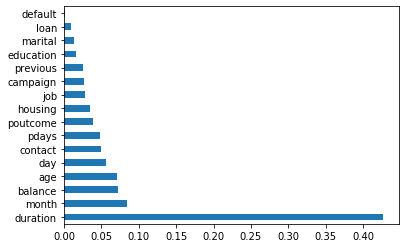

In [188]:
# https://stackoverflow.com/questions/44511636/matplotlib-plot-feature-importance-with-feature-names
# clf_rf.best_estimator_.feature_importances_
feat_importances = pd.Series(clf_rf.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')